In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
#!/usr/bin/env python
# coding: utf-8


In [2]:
#For data processing
import pandas as pd
import numpy as np
import datetime as dt

#For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For models
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# IMPORTING IMPORTANT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from keras.optimizers import RMSprop, SGD, Adam
import preprocessing 


In [3]:
df = pd.read_csv("C:\\Users\\tcgra\\Documents\\LJMU_Code\Datasets\\reliance_stock.csv")

These key features are used for LSTM

In [4]:
# PREPARATION OF TIME SERIES DATASE
lstm_df = df[['Open','High','Low','Close']]
lstm_df.head(7)

,Open,High,Low,Close
0,90.591797,90.591797,88.584702,89.131401
1,89.732803,91.981903,89.131401,91.403999
2,91.372803,92.138100,89.342300,90.599602
3,90.748001,91.919502,88.100502,89.404800
4,89.061096,90.982300,88.561302,90.615196
5,91.372803,93.387703,91.083801,92.169403
6,93.715698,94.598198,89.834297,90.380997


In [5]:
print('Total dataset has {} samples, and {} features.'.format(lstm_df.shape[0], \
                                                            lstm_df.shape[1]))

Total dataset has 3698 samples, and 4 features.


In [6]:
df_close = lstm_df['Close']

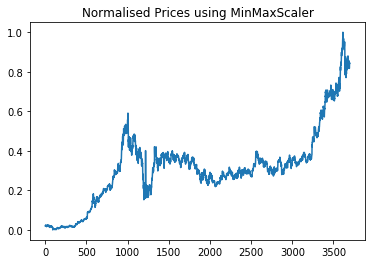

In [7]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) 
df_close = df_close.values.reshape(df_close.size,1) #Reshaping it
df_close = scaler.fit_transform(df_close)


#Ploting it
plt.plot(df_close)
plt.title('Normalised Prices using MinMaxScaler')
plt.show()

In [8]:
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler

# #Ploting it
# plt.plot(df_close)
# plt.title('Standardised Prices using StandardScaler')
# plt.show()

# scaler = StandardScaler(feature_range=(0, 1))
# df_close = scaler.fit_transform(df_close)

Split dataset into train and test

In [9]:
#creating test, train and validate trains
train_size = int(len(df_close) * 0.80)
test_size = len(df_close) - train_size
train_df, test_df = df_close[0:train_size,:], df_close[train_size:len(df_close),:]
print(len(train_df), len(test_df))

2958 740


Normalize data: The data is not normalized and the range for each column varies, especially Volume. Normalizing data helps the algorithm in converging i.e. to find local/ global minimum efficiently. Use MinMaxScaler from Sci-kit Learn.

In [10]:
# FUNCTION TO CREATE 1D DATA INTO TIME SERIES DATASET
# function to create Features and Labels datasets
# Arguments: 1) data - dataset used in the project 
#            2) window_size = step_size data points to use to predict the next datapoint in the sequence 
# Outputs: 
#            X - features splitted into windows of datapoints (if window_size = 1, X = [len(data)-1, 1])
#            y - 'labels', actually this is the next number in the sequence, this number we are trying to predict

def create_dataset(dataset, window_size): 
	dataX, dataY = [], []       
	for i in range(len(dataset)-window_size-1): 
		a = dataset[i:(i+window_size), 0]
		dataX.append(a)
		dataY.append(dataset[i + window_size, 0])
	return np.array(dataX), np.array(dataY)

Convert feature set and label set into arrays and shape feature set into a 3D input that LSTM network demands

In [11]:
# window_size =1 [predicting the next day]

# Windowing the data with create_dataset function

trainX, trainY = create_dataset(train_df, 1)
testX, testY = create_dataset(test_df, 1)

#Re-shaping the data set to 3D
#3D: sample_size, window_size or time_steps and input features
# trainX.shape[0], window_size, trainX.shape[1] 


trainX = np.reshape(trainX, (trainX.shape[0],1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0],1, testX.shape[1]))


window_size = 1

In [12]:
print("trainX:",trainX.shape,"trainY:",trainY.shape,"testX:",testX.shape,"testY:",testY.shape)

trainX: (2956, 1, 1) trainY: (2956,) testX: (738, 1, 1) testY: (738,)


In [13]:

#library for LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten

#Step - Build Model

model = Sequential()

model.add(LSTM(units=128, return_sequences=True, input_shape=(trainX.shape[1],window_size)))
model.add(Dropout(0.2))

model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units = 1)) #output layer
model.add(Activation('relu'))

import time #helper libraries
start = time.time()
#opt = RMSprop(lr=0.01, momentum=0.0)
opt = RMSprop()
model.compile(optimizer = opt, loss = 'mean_squared_error', metrics = ['mean_absolute_error'])
print ('compilation time : ', time.time() - start)

compilation time :  0.0060138702392578125


In [14]:
history=model.fit(trainX, trainY, epochs = 50, batch_size = 32,validation_data = (trainX, trainY))


Epoch 1/50
93/93 [==============================] - 1s 9ms/step - loss: 0.0115 - mean_absolute_error: 0.0744 - val_loss: 2.7492e-04 - val_mean_absolute_error: 0.0122
Epoch 2/50
93/93 [==============================] - 0s 3ms/step - loss: 7.6715e-04 - mean_absolute_error: 0.0207 - val_loss: 1.8705e-04 - val_mean_absolute_error: 0.0103
Epoch 3/50
93/93 [==============================] - 0s 4ms/step - loss: 6.9770e-04 - mean_absolute_error: 0.0194 - val_loss: 7.0577e-04 - val_mean_absolute_error: 0.0238
Epoch 4/50
93/93 [==============================] - 0s 4ms/step - loss: 6.2290e-04 - mean_absolute_error: 0.0185 - val_loss: 1.3358e-04 - val_mean_absolute_error: 0.0080
Epoch 5/50
93/93 [==============================] - 0s 3ms/step - loss: 5.5132e-04 - mean_absolute_error: 0.0170 - val_loss: 1.0784e-04 - val_mean_absolute_error: 0.0065
Epoch 6/50
93/93 [==============================] - 0s 4ms/step - loss: 5.2504e-04 - mean_absolute_error: 0.0167 - val_loss: 3.5616e-04 - val_mean_absolut

Epoch 49/50
93/93 [==============================] - 0s 4ms/step - loss: 2.1575e-04 - mean_absolute_error: 0.0103 - val_loss: 2.5197e-04 - val_mean_absolute_error: 0.0131
Epoch 50/50
93/93 [==============================] - 0s 4ms/step - loss: 2.0620e-04 - mean_absolute_error: 0.0100 - val_loss: 9.9413e-05 - val_mean_absolute_error: 0.0061


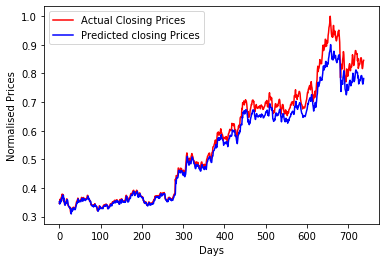

In [15]:
import matplotlib.pyplot as plt
predicted_stateful = model.predict(testX)
plt.plot(testY, color = 'red',label = 'Actual Closing Prices')
plt.plot(predicted_stateful.flatten(), color = 'blue', label  = 'Predicted closing Prices')
plt.xlabel('Days')
plt.ylabel('Normalised Prices')
plt.legend(loc='best')
plt.show()

In [16]:
 model.summary()
# print(len(model.layers))  # 2

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            66560     
_________________________________________________________________
dropout (Dropout)            (None, 1, 128)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 116,033
Trainable params: 116,033
Non-trainable params: 0
__________________________________________________

In [17]:
# PREDICTION
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [18]:
# DE-NORMALIZING FOR PLOTTING
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print('Train Mean Absolute Error:', mean_absolute_error(trainY[0], trainPredict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(testY[0], testPredict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(testY[0], testPredict[:,0])))
print("Train R2 Score:", (r2_score(trainY[0], trainPredict[:,0])),  "Test R2 Score:", (r2_score(testY[0], testPredict[:,0])))

Train Mean Absolute Error: 7.669500397409896
Train Root Mean Squared Error: 12.521577562553954
Test Mean Absolute Error: 29.632205539279514
Test Root Mean Squared Error: 42.17696647476662
Train R2 Score: 0.9940587019290865 Test R2 Score: 0.9693729156701112


In [20]:
# CREATING SIMILAR DATASET TO PLOT TRAINING PREDICTIONS
#step_size = window_size
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[window_size:len(trainPredict)+window_size, :] = trainPredict
print(len(trainPredictPlot))

3698


In [21]:
# CREATING SIMILAR DATASSET TO PLOT TEST PREDICTIONS
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(window_size*2)+1:len(df_close)-1, :] = testPredict
print(len(testPredictPlot))

3698


In [22]:
# DE-NORMALIZING MAIN DATASET 
df_close = scaler.inverse_transform(df_close)

### 

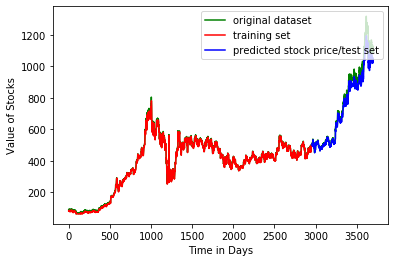

In [23]:
# PLOT OF MAIN VALUES, TRAIN PREDICTIONS AND TEST PREDICTIONS
plt.plot(df_close, 'g', label = 'original dataset')
plt.plot(trainPredictPlot, 'r', label = 'training set')
plt.plot(testPredictPlot, 'b', label = 'predicted stock price/test set')
plt.legend(loc = 'upper right')
plt.xlabel('Time in Days')
plt.ylabel('Value of Stocks')
plt.show()

In [24]:
last_val = testPredict[-1]
print(last_val)

[1045.5938]


In [25]:
last_val_scaled = last_val/last_val
print(last_val_scaled)

[1.]


In [26]:
next_val = model.predict(np.reshape(last_val_scaled, (1,1,1)))

In [28]:
# PREDICT FUTURE VALUES
last_val = testPredict[-1]
last_val_scaled = last_val/last_val
next_val = model.predict(np.reshape(last_val_scaled, (1,1,1)))
print ("Last Day Value:" , np.asscalar(last_val))
print ("Next Day Value:" , np.asscalar(last_val*next_val))
#print (np.append(last_val, next_val))

Last Day Value: 1045.59375
Next Day Value: 941.9628295898438


C:\Users\tcgra\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  """
C:\Users\tcgra\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
# PREDICT FUTURE VALUES

# future_days = [10,50,100,200,365]
# real_val = np.empty(shape=[0, 2])
# pred_val = np.empty(shape=[0, 2])
# for i in future_days:
#     last_val = testPredict[-i]
#     last_val_scaled = last_val/last_val
#     next_val = model.predict(np.reshape(last_val_scaled, (1,1,1)))
#     day_real_val = np.asscalar(last_val)
#     day_pred_val = np.asscalar(last_val*next_val)
# #     print("last val scaled:", last_val,"next_val:", day_pred_val)
# #     print ("Future Days:", i, "Last Day Value:",day_real_val, "Next Day Value:",day_pred_val, "test Score:", testScore)
#     real_val = np.append(real_val,day_real_val)
#     pred_val = np.append(pred_val,day_pred_val)
# print(real_val)
# print(pred_val)

In [ ]:
# from sklearn.metrics import mean_absolute_error
# from math import sqrt
# mae = mean_absolute_error(real_val, pred_val)
# print('MAE: %f' % mae)

# mse = mean_squared_error(real_val, pred_val)
# rmse = sqrt(mse)
# print('RMSE: %f' % rmse)

# r2 = r2_score(real_val, pred_val)
# print('R2: %f' % r2)